# Dependencies

In [ ]:

%matplotlib inline

import math, time, random, datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

Could not find my file here hence abit of searching, removed some of the search because all the error messages looked messy  

In [9]:
import os

In [10]:
os.getcwd()

'/Users/jamiepeters'

In [19]:
os.chdir('/Users/jamiepeters/Desktop')

Importing the data (finaly) 

In [22]:
dataset = pd.read_csv ('titanicdata.csv')

Testing to see if the data is what it should be. 

In [23]:
dataset.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
dataset.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [27]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Question 1: Survival Rate
## Sample vs. Real World 

When the Titanic sank, it resulted in the deaths of 1502 out of 2224 passengers and crew, translating to a 32% survival rate. I just found this info online, was not quite sure if it's something you wanted me to work out. 

In our test sample, we have 891 passengers of which 549 did not survive, resulting in a 38% survival rate. 

This is quite close to the original survival rate but our test sample does not account for crew – that might be where our NaN values come from in the cabin column but I cannot say with any certainty.  


# Question 2 

## Plot A: Number of people who survived vs. number of people who died 

0    549
1    342
Name: Survived, dtype: int64


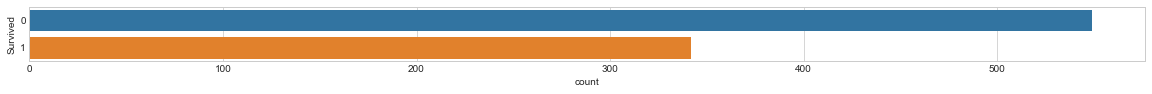

In [28]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=dataset);
print(dataset.Survived.value_counts())

In [31]:
df_bin = pd.DataFrame() # discrete continuous variables
df_con = pd.DataFrame() # continuous variables

In [32]:
df_bin['Survived'] = dataset['Survived']
df_con['Survived'] = dataset['Survived']

In [33]:
df_bin.head(5)

,Survived
0,0
1,1
2,1
3,1
4,0


In [34]:
df_con.head(5)

,Survived
0,0
1,1
2,1
3,1
4,0


## Plot B: Number of people who survived who were male vs. number of people who survived who were female

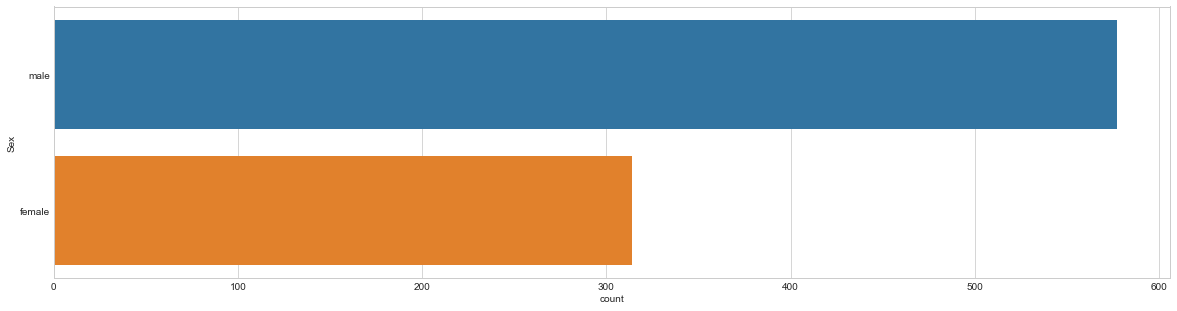

In [36]:
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=dataset);

In [37]:
df_bin['Sex'] = dataset['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # 0 for male and 1 for female

df_con['Sex'] = dataset['Sex']

/Users/jamiepeters/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jamiepeters/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


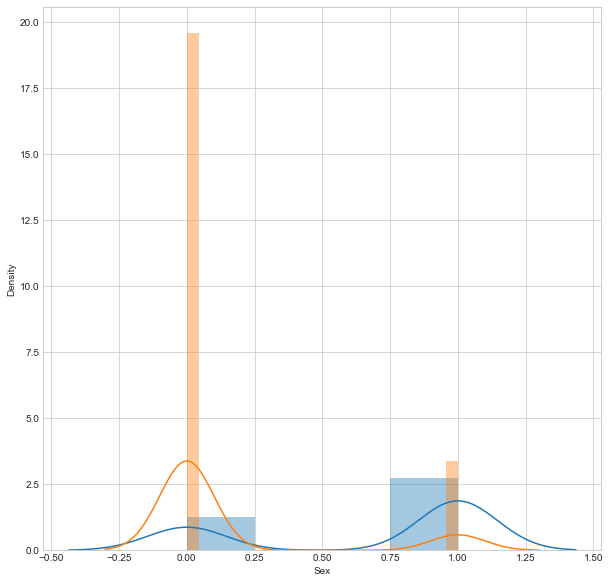

In [45]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

## Plot C: Number of people who survived by class number

/Users/jamiepeters/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

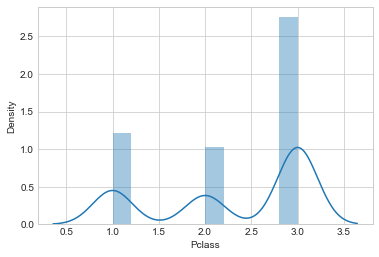

In [46]:
sns.distplot(dataset.Pclass)


In [47]:
df_bin['Pclass'] = dataset['Pclass']
df_con['Pclass'] = dataset['Pclass']

/Users/jamiepeters/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jamiepeters/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


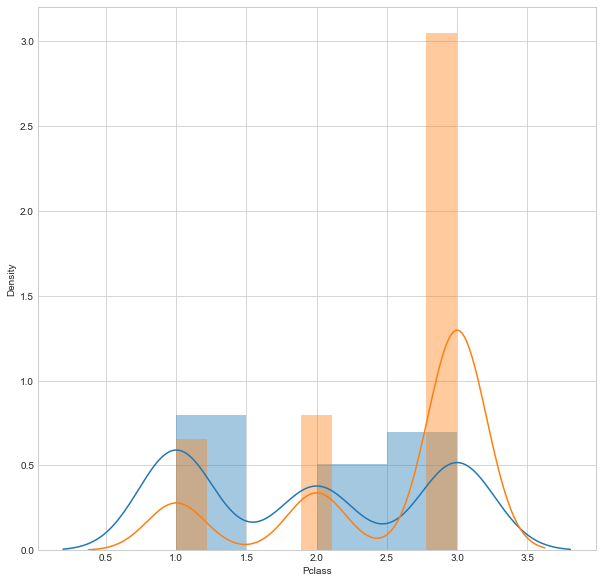

In [48]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Pclass'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Pclass'], kde_kws={'label': 'Did not survive'});

# Question 3 Plot A: Histogram showing the ticket price distribution for third class passengers 

Struggled with this one, so did a tutorial on how to split the data

In [87]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
1,1,0,1,1,0,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,1,1,0,0,0,0,0,0,1
3,1,0,1,1,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,1,1,0,0,0,0,0,0,1


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

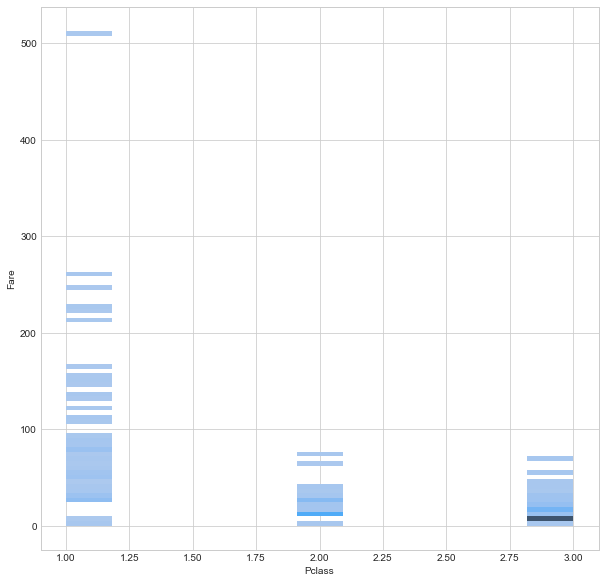

In [98]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(x='Pclass',y='Fare',data=dataset)

Still struggling to figure this one out. I wanted to have the Pclass-3 set only 

# Question 4 
## Probability of survival given passenger is a man

In [108]:
dataset.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [113]:
df = pd.read_csv ('titanicdata.csv')

In [114]:
men = df[(df['Sex'] == 'male') & (df['Age'] > 16)]
surviving_men = df[(df['Sex'] == 'male') & (df['Age'] > 16) & (df['Survived'] == 1)]
men_chance_of_survival = surviving_men.shape[0] / men.shape[0]
format(men_chance_of_survival, ".0%")

'18%'

## Probability of survival given passenger is a female

In [115]:
women = df[(df['Sex'] == 'female') & (df['Age'] > 16)]
surviving_women = df[(df['Sex'] == 'female') & (df['Age'] > 16) & (df['Survived'] == 1)]
women_chance_of_survival = surviving_women.shape[0] / women.shape[0]
format(women_chance_of_survival, ".0%")

'77%'

## Probability of survival given passenger is a male and in first class

In [117]:
first_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 1)]
first_class_adult_men_survival_rate = first_class_adult_men['Survived'].value_counts(normalize=True) * 100
first_class_adult_men_survival_rate

0    62.244898
1    37.755102
Name: Survived, dtype: float64

## Probability of survival given passenger is a male and in third class

In [118]:
third_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 3)]
thrird_class_adult_men_survival_rate = third_class_adult_men['Survived'].value_counts(normalize=True) * 100
thrird_class_adult_men_survival_rate

0    87.037037
1    12.962963
Name: Survived, dtype: float64

## Survival rate by family size 

In [124]:
df = pd.read_csv ('titanicdata.csv')

In [126]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

I keep getting an error here when I try and continue, telling me SibSp and Parch are not integers. but up there it says they are, so stuck stuck stuck. 